In [1]:
# Install requirement packages
# pip install pmdarima
# pip install pandas
# pip install numpy
# pip install matplotlib

In [2]:
# Import necessary libraries
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing pmdarima package
get_ipython().system(' pip install pmdarima')

You should consider upgrading via the 'C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
# Importing auto_arima 
from pmdarima.arima import auto_arima

In [5]:
# Read the dataset
data = pd.read_csv('Example.csv')
print('Ukuran dataset :', data.shape)
data.head()

Ukuran dataset : (105, 2)


,Month,Champagne_sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [6]:
# Make sure there are no null values at the end of the dataset
data.tail()

,Month,Champagne_sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [7]:
# Check the data types
data.dtypes

Month              object
Champagne_sales     int64
dtype: object

In [8]:
# Convert the month column to datetime
data['Month']=pd.to_datetime(data['Month'])

# Recheck the datatypes
data.dtypes

Month              datetime64[ns]
Champagne_sales             int64
dtype: object

<AxesSubplot:>

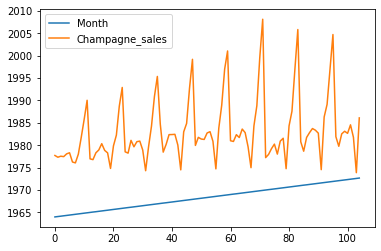

In [9]:
# Check plot of dataset
data.plot()

In [10]:
#Stationarity test
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[int64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>)

In [ ]:
# Split data into training and testing
# here's split from 105 data with 80% train and 20% test 
train = data[:85]
test = data[-20:]

In [ ]:
# Checking training data
train.tail()

,Champagne_sales
Month,
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076
1971-01-01,3934


In [ ]:
# Checking tesing data
test.head()

,Champagne_sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874


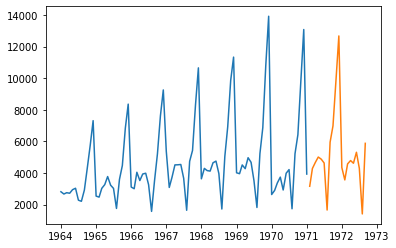

In [ ]:
# Plot of training data
# train.plot()
# test.plot()

plt.plot(train)
plt.plot(test)

In [ ]:
# Build model
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.51 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.53 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.84 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.33 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.99 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.740, Time=2.27 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.66 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [ ]:
# Model summary
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Tue, 26 Jul 2022   AIC                           1174.564
Time:                                     13:57:43   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make prediction
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),
                          index=test.index)
prediction.columns = ['predicted_data']
prediction

# n_period = fill with #obs in training data

,predicted_data
Month,
1971-02-01,2746.693767
1971-03-01,3247.938931
1971-04-01,3592.497895
1971-05-01,2800.897888
1971-06-01,3841.897060
1971-07-01,4088.038645
1971-08-01,1596.302142
1971-09-01,5090.015585
1971-10-01,6284.003861


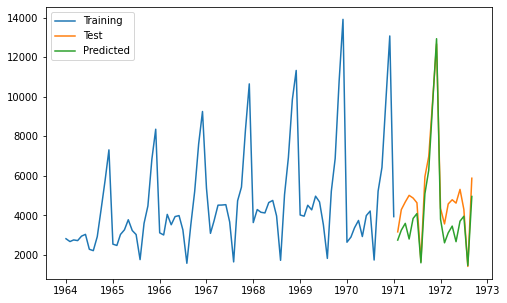

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend()
plt.show()

In [ ]:
# Checking model credibility
from sklearn.metrics import r2_score
test['predicted'] = prediction
r2_score(test['Champagne_sales'], test['predicted'])

0.8114782578755401